___
# PROJETO 2 - T2B: <p> <center> Análise Exploratória de Dados 
___
    
### Integrantes: <br>
    1. Bruno Netto
    2. Leonardo Arcanjo
    3. Nathan Carlos Braga do Carmo
    

___
<div id="indice"></div>

## Índice

- [REGRAS](#regras)  
- [CONTEXTO](#contexto)  
- [DICIONÁRIO DAS VARIÁVEIS](#dados)
- [OBJETIVO](#objetivo)
- [LEITURA DA BASE DE DADOS](#leitura)
- [PREPARO DA BASE DE DADOS](#preparo)
- [ANÁLISE EXPLORATÓRIA DE DADOS](#AED)

___
<div id="regras"></div>

## REGRAS

Antes de começar a resolução deste projeto, leia e siga as instruções abaixo:

  1. **Deadline:** 26/03/2024, final da aula, via Blackboard.
  
  <p>
  
  2. **Grupos:** máximo de 4 alunos

  <p>
    
  3. **Tarefas do grupo:**
     * Trabalhem em equipe para concluir esta tarefa com êxito. 
     * Saibam distribuir tarefas entre vocês.
     * Discutam, prévia e exclusivamente entre os alunos do mesmo grupo, a estratégia e elaboração para resolver este caso. 
 
  <p>
  
  4. **Responsabilidades:**
     * Todos os integrantes do grupo têm total e igual responsabilidade sobre o trabalho entregue, isso vale para os acertos, erros e possíveis plágios.
     * Código de ética se aplica a este trabalho. Leia o Manual do Aluno disponível no Portal do Aluno do Insper e as regras disponíveis aqui.

  <p>
       
   5. **Arquivos a serem enviados:**
      * `Projeto2_RELATORIO.docx` utilize esse arquivo para construir um relatório com a análise descritiva e as devidas conclusões do problema apresentado. 
      * `Projeto2_AED.ipynb` ao terminar a análise, todos os arquivos do Jupyter Notebook que foram utilizados para construir as análises do relatório devem ser anexado no Blackboard. 

  <p>
        
   6. **Atenção:**
      * Números e/ou resultados que apareçam sem uma explicação de como foram encontrados serão ignorados ou penalizados na correção. 
      * Clareza, organização, formatação, fluidez no texto e ortografia serão pontuadas neste trabalho.
      * Se não houver arquivos de programação com Python disponibilizado no Blackboard, o grupo terá a nota do Projeto 2 ZERADA (igual a zero).
 
   <p>
          
**BOM TRABALHO!!**


___
<div id="contexto"></div>

## CONTEXTO

Imagine que você é um consultor educacional que trabalha com universidades e instituições de ensino superior. <br>
Seu objetivo é ajudá-los a otimizar o processo de admissão de estudantes em seus programas de pós-graduação.

<div id="dados"></div>

## DICIONÁRIO DAS VARIÁVEIS

Na base de dados, cada linha corresponde a um estudante e cada coluna captura diferentes características desses estudantes.<br>

As variáveis apresentadas na base de dados `Projeto2_DADOS-T2B.xslx` são: <p>

 * `Serie_No`: Identificação única do estudante na base de dados. <p> 
    
 * `Nota_GRE`: Nota do estudante no exame GRE (Graduate Record Examination), com uma pontuação máxima de 340. <br> 
   O GRE é um teste padrão para estudantes de graduação que estão buscando ingressar em programas de pós-graduação em universidades. <p>
     
 * `Nota_TOEFL`: Nota do estudante no exame TOEFL (Test of English as a Foreign Language), com uma pontuação máxima de 120.<br>
   O TOEFL é um teste projetado para avaliar a proficiência em inglês de falantes não nativos em um ambiente acadêmico. <p>
     
 * `Taxa_SOP`: Avaliação da qualidade da declaração de propósito do estudante para a vaga, com um valor de 0 até 5. <br>
   O SOP (Statement of Purpose) é uma declaração de propósito do estudante indicando sua motivação à vaga de pós-graduação.<p>
         
 * `Taxa_LOR`: Avaliação da qualidade da carta de recomendação do estudante à vaga, com um valor de 0 até 5. <br>
   O LOR (Letter of Recommendation) é uma carta escrita geralmente por algum professor universitário que recomenda o estudante para um programa de pós-graduação. <p>
       
 * `Taxa_CGPA`: Nota média do estudante durante a graduação, com um valor de 0 até 10. <br>
   O CGPA (Cumulative Grade Point Average) reflete o desempenho acadêmico do estudante durante sua graduação. <p>
       
 * `Pesquisa`: Indica se estudante de graduação possui experiência em pesquisa, com valor 0 para **não** e 1 para **sim**. <p>
     
 * `Admissao`: Indica se estudante de graduação tem alta probabilidade de admissão em um curso de pós-graduação, com valor 0 para **não** e 1 para **sim**.
 
  


___
<div id="objetivo"></div>

## OBJETIVO

Neste projeto, nosso foco é identificar as características mais relevantes de um estudante de graduação, presentes na base de dados, que aumentam sua probabilidade de ser admitido em um curso de pós-graduação. <br>
Assuma que o objetivo deste estudo considera a variável `Admissao` como **target** (ou seja, variável principal) e as demais como **features** (ou seja, possíveis variáveis que explicam mudanças na variável principal). <br>
Para isso, a Análise Exploratória de Dados desenvolvida pelo seu grupo deve utilizar ferramentas estatísticas para:

 1. Descrever o perfil dos estudantes com alta probabilidade de admissão em cursos de pós-graduação, levando em consideração suas características.
 2. Descrever o perfil dos estudantes sem alta probabilidade de admissão em cursos de pós-graduação, considerando suas características.
 3. Comparar e identificar semelhanças e diferenças nas diversas características dos estudantes com e sem alta probabilidade de admissão na universidade.
 4. Determinar se um novo estudante, com valores específicos nas seguintes variáveis, seria admitido na universidade:
 
 `Nota_GRE` |	`Nota_TOEFL` |	`Taxa_SOP` |	`Taxa_LOR` | `Taxa_CGPA` | `Pesquisa`
 :-:|:-:|:-:|:-:|:-:|:-:
 225|100|5,00|4,50|7,05|1



[Volta ao Índice](#indice)

In [40]:
%matplotlib inline
import math
import os

import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import pandas as pd

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

from IPython.display import display  # Para ter melhor print.

<div id="leitura"></div>

## LEITURA DA BASE DE DADOS

In [41]:
print("Esperamos trabalhar no diretório")
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\conta\OneDrive\Área de Trabalho\acadêmico\insper\segundo semestre\Ciencia dos dados\projeto 2\projeto2_cdados


In [42]:
filename = 'Projeto2_DADOS-T2B.xlsx'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook da avaliação, yay!\n')
    
else:
    print(f'Não encontrei o arquivo {filename}.\n'
          f'O notebook e os arquivos de dados desta avaliação devem ser salvos dentro da mesma pasta no seu computador.\n')

Parece que o arquivo Projeto2_DADOS-T2B.xlsx está na mesma pasta do notebook da avaliação, yay!



In [43]:
# Carregando os dados
t2b = pd.read_excel('Projeto2_DADOS-T2B.xlsx')

t2b.head()


,Serio_No,Nota_GRE,Nota_TOEFL,Taxa_SOP,Taxa_LOR,Taxa_CGPA,Pesquisa,Admissao
0,1,337,118,4.5,4.5,9.65,1,1
1,2,324,107,4.0,4.5,8.87,1,1
2,3,316,104,3.0,3.5,8.00,1,0
3,4,322,110,3.5,2.5,8.67,1,1
4,5,314,103,2.0,3.0,8.21,0,0


#OBJETIVOS

- dois dataframes - FEITO - BRUNO
- correlação
- histograma, boxplot, scatter, (groupby + pd.cut, bar) pra cada caracteristica


- groupby
- pd cut em cada uma das caracteristicas
- crostbab com cada uma das caracteristicas

[Volta ao Índice](#indice)

<div id="preparo"></div>

## PREPARO DA BASE DE DADOS

**IMPORTANTE:** Certifique-se de que o dataframe esteja reconhecendo corretamente as variáveis qualitativas, de acordo com o dicionário fornecido. Caso não esteja, faça essa transformação conforme visto em aula.

In [44]:
type(t2b)

pandas.core.frame.DataFrame

In [45]:
t2b.Pesquisa=t2b.Pesquisa.astype('category')
t2b.Admissao=t2b.Admissao.astype('category')
t2b = t2b.rename(columns={'Taxa_LOR ':'Taxa_LOR'})
t2b.Pesquisa=t2b.Pesquisa.cat.rename_categories({1:'sim', 0:'nao'})
t2b.Admissao=t2b.Admissao.cat.rename_categories({1:'sim', 0:'nao'})
t2b.head()
t2b.columns

Index(['Serio_No', 'Nota_GRE', 'Nota_TOEFL', 'Taxa_SOP', 'Taxa_LOR',
       'Taxa_CGPA', 'Pesquisa', 'Admissao'],
      dtype='object')

In [46]:

admitidos = t2b.loc[(t2b.Admissao=='sim'),:]
n_admitidos= t2b.loc[(t2b.Admissao=='nao'),:]

admitidos



,Serio_No,Nota_GRE,Nota_TOEFL,Taxa_SOP,Taxa_LOR,Taxa_CGPA,Pesquisa,Admissao
0,1,337,118,4.5,4.5,9.65,sim,sim
1,2,324,107,4.0,4.5,8.87,sim,sim
3,4,322,110,3.5,2.5,8.67,sim,sim
5,6,330,115,4.5,3.0,9.34,sim,sim
6,7,321,109,3.0,4.0,8.20,sim,sim
...,...,...,...,...,...,...,...,...
394,395,329,111,4.5,4.0,9.23,sim,sim
395,396,324,110,3.5,3.5,9.04,sim,sim
396,397,325,107,3.0,3.5,9.11,sim,sim
397,398,330,116,5.0,4.5,9.45,sim,sim


In [47]:
admitidos.Nota_GRE.describe()
admitidos.Nota_TOEFL.describe()
admitidos.Taxa_SOP.describe()
# admitidos.Taxa_LOR.describe()
# admitidos.Taxa_CGPA.describe()

# n_admitidos.Nota_GRE.describe()
# n_admitidos.Nota_TOEFL.describe()
# n_admitidos.Taxa_SOP.describe()
# n_admitidos.Taxa_LOR.describe()
# n_admitidos.Taxa_CGPA.describe()

count    180.000000
mean       4.080556
std        0.709402
min        2.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Taxa_SOP, dtype: float64

plt.hist(admitidos.Nota_GRE)

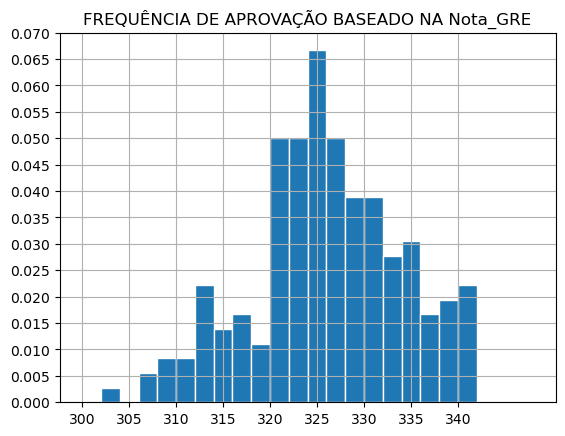

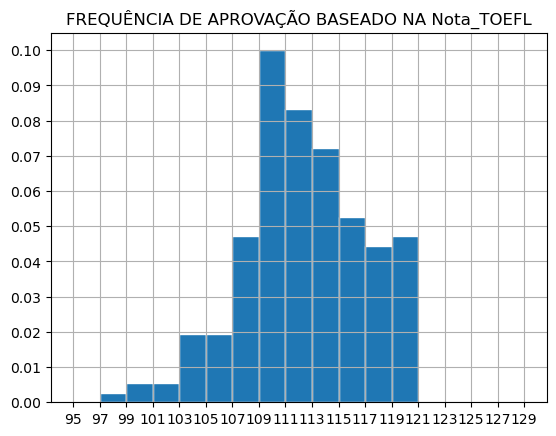

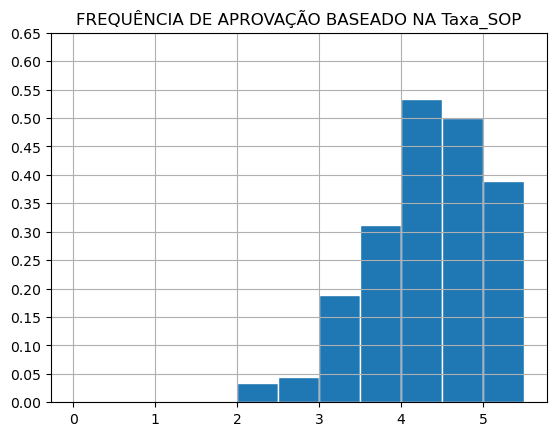

In [48]:


plt.hist(admitidos.Nota_GRE, edgecolor='white',  bins=list(range(300,350,2)), density=True)
plt.grid()
plt.xticks(list(np.arange(300,345,5)))
plt.yticks(list(np.arange(0,0.07,0.005)))
plt.title('FREQUÊNCIA DE APROVAÇÃO BASEADO NA Nota_GRE')
plt.show()



plt.hist(admitidos.Nota_TOEFL, edgecolor='white',  bins=list(range(95,130,2)), density=True)
plt.grid()
plt.xticks(list(np.arange(95,130,2)))
plt.yticks(list(np.arange(0,0.11,0.01)))
plt.title('FREQUÊNCIA DE APROVAÇÃO BASEADO NA Nota_TOEFL')


plt.show()

plt.hist(admitidos.Taxa_SOP, edgecolor='white',  bins=list(np.arange(0,6,0.5)), density=True)
plt.grid()
plt.yticks(list(np.arange(0,0.7,0.05)))
plt.title('FREQUÊNCIA DE APROVAÇÃO BASEADO NA Taxa_SOP')

plt.show()


# plt.hist(admitidos.Taxa_LOR, edgecolor='white',  bins=list(range(300,350,2)), density=True)
# plt.grid()
# plt.xticks(list(np.arange(300,345,5)))
# plt.yticks(list(np.arange(0,0.07,0.005)))
# plt.title('FREQUÊNCIA DE APROVAÇÃO BASEADO NA Taxa_LOR')


# plt.hist(admitidos.Nota_GRE, edgecolor='white',  bins=list(range(300,350,2)), density=True)
# plt.grid()
# plt.xticks(list(np.arange(300,345,5)))
# plt.yticks(list(np.arange(0,0.07,0.005)))
# plt.title('FREQUÊNCIA DE APROVAÇÃO BASEADO NA Nota_GRE')



[Volta ao Índice](#indice)

<div id="AED"></div>

## ANÁLISE EXPLORATÓRIA DE DADOS

O objetivo principal que norteia a manipulação dessa base de dados é compreender quais características dos estudantes de graduação são determinantes na distinção entre aqueles com e sem alta probabilidade de admissão em cursos de pós-graduação.

Nesse caso, utilize ferramentas estatísticas **GRÁFICAS** e/ou **TABELAS NUMÉRICAS** que permitam explorar o conjunto de dados frente aos objetivos.


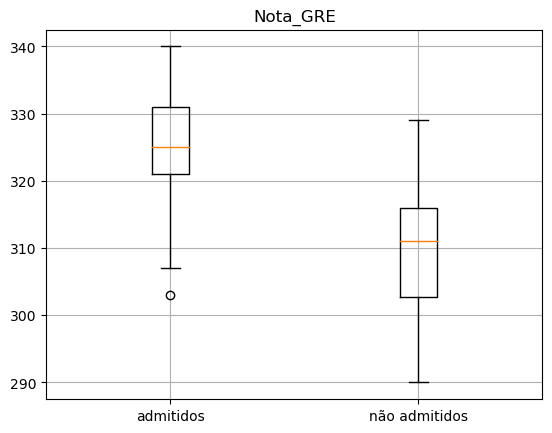

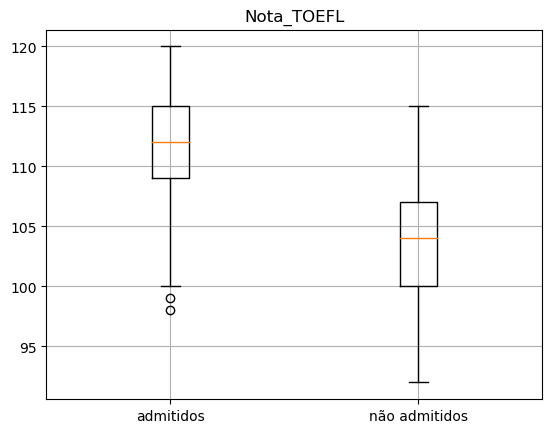

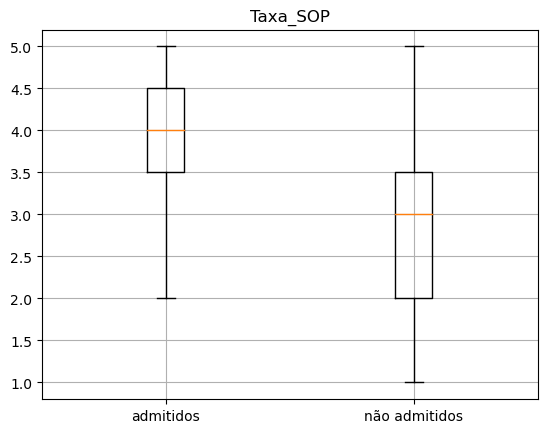

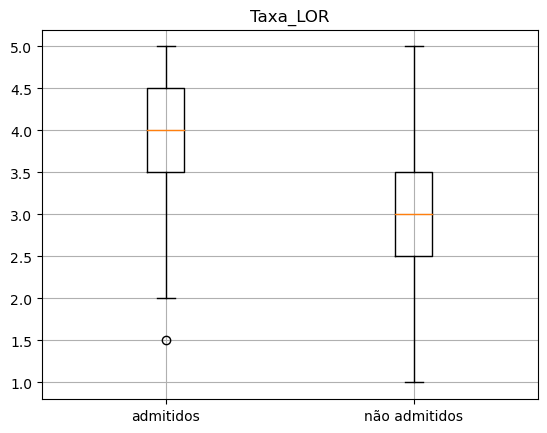

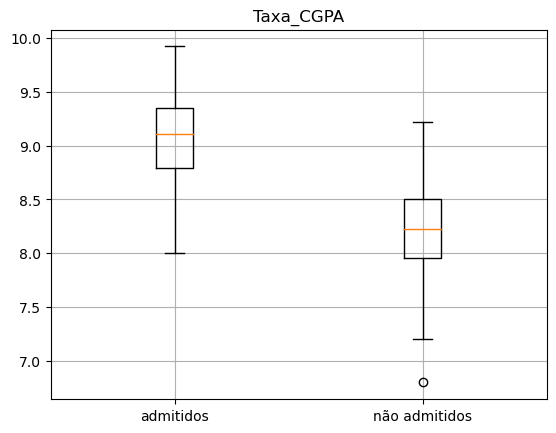

In [58]:
plt.boxplot([admitidos.Nota_GRE, n_admitidos.Nota_GRE], labels = ['admitidos', 'não admitidos'])
plt.title('Nota_GRE')
plt.grid()
plt.show()

plt.boxplot([admitidos.Nota_TOEFL, n_admitidos.Nota_TOEFL], labels = ['admitidos', 'não admitidos'])
plt.title('Nota_TOEFL')
plt.grid()
plt.show()

plt.boxplot([admitidos.Taxa_SOP, n_admitidos.Taxa_SOP], labels = ['admitidos', 'não admitidos'])
plt.title('Taxa_SOP')
plt.grid()
plt.show()

plt.boxplot([admitidos.Taxa_LOR, n_admitidos.Taxa_LOR], labels = ['admitidos', 'não admitidos'])
plt.title('Taxa_LOR')
plt.grid()
plt.show()

plt.boxplot([admitidos.Taxa_CGPA, n_admitidos.Taxa_CGPA], labels = ['admitidos', 'não admitidos'])
plt.title('Taxa_CGPA')
plt.grid()
plt.show()

[Volta ao Índice](#indice)